## Implementasi Global Tresholding

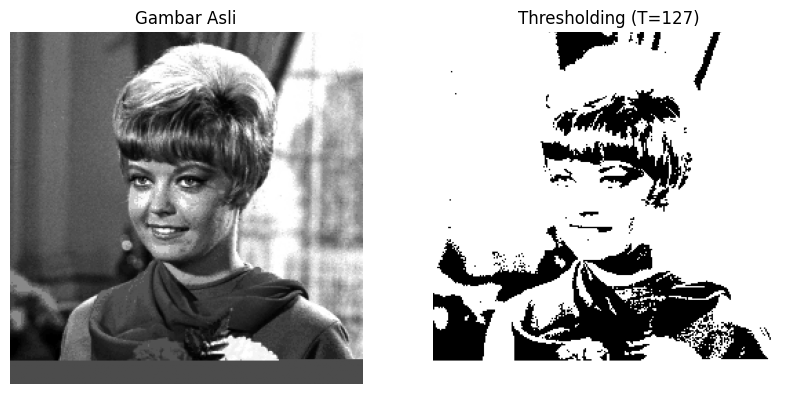

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def global_thresholding(image_path, threshold_value):
    # Membaca gambar dalam mode grayscale
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)
    
    # Menerapkan global thresholding
    thresholded_image = np.where(image_array > threshold_value, 255, 0).astype(np.uint8)
    
    # Menampilkan hasil
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_array, cmap='gray')
    plt.title('Gambar Asli')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(thresholded_image, cmap='gray')
    plt.title(f'Thresholding (T={threshold_value})')
    plt.axis('off')
    
    plt.show()
    
    return thresholded_image

# Contoh penggunaan
image_path = 'girl-warna.bmp'  # Ganti dengan path gambar yang sesuai
threshold_value = 127
global_result = global_thresholding(image_path, threshold_value)


## Implementasi Adaptive Tresholding

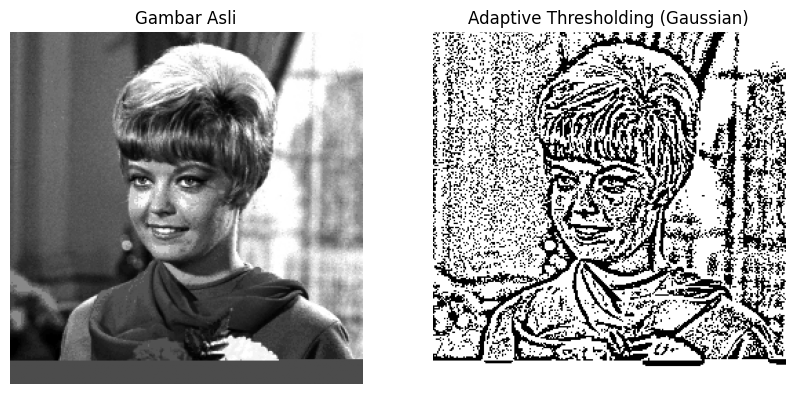

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def adaptive_thresholding(image_path, max_value, method, block_size, c):
    # Membaca gambar dalam mode grayscale
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)
    
    # Mendapatkan ukuran gambar
    height, width = image_array.shape
    thresholded_image = np.zeros((height, width), dtype=np.uint8)
    
    # Padding untuk menghindari masalah di tepi gambar
    pad = block_size // 2
    padded_image = np.pad(image_array, pad, mode='reflect')
    
    for i in range(height):
        for j in range(width):
            # Mendapatkan blok lokal
            local_block = padded_image[i:i+block_size, j:j+block_size]
            
            if method == 'mean':
                threshold = np.mean(local_block) - c
            elif method == 'gaussian':
                weights = np.exp(-((np.arange(block_size) - pad)[:, None]**2 + (np.arange(block_size) - pad)[None, :]**2) / (2.0 * (block_size / 6.0)**2))
                weights /= weights.sum()
                threshold = np.sum(local_block * weights) - c
            else:
                raise ValueError("Metode harus 'mean' atau 'gaussian'")
            
            thresholded_image[i, j] = max_value if image_array[i, j] > threshold else 0
    
    # Menampilkan hasil
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_array, cmap='gray')
    plt.title('Gambar Asli')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(thresholded_image, cmap='gray')
    plt.title(f'Adaptive Thresholding ({method.capitalize()})')
    plt.axis('off')
    
    plt.show()
    
    return thresholded_image

# Contoh penggunaan
image_path = 'girl-warna.bmp'  # Ganti dengan path gambar yang sesuai
max_value = 255
method = 'gaussian'  # Bisa 'mean' atau 'gaussian'
block_size = 11  # Harus ganjil
c = 2

adaptive_result = adaptive_thresholding(image_path, max_value, method, block_size, c)